## Data Cleanup and Exploration

In [43]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
from path import Path
import seaborn as sns
from config import db_URI

In [44]:
engine = create_engine(db_URI)

In [45]:
# Importing GDP from the database
gdp_df = pd.read_sql_query("select * from cleaned_gbp_csv", con=engine)
print(gdp_df.shape)
gdp_df.head()

(50, 8)


,column1,state_name,description,gdp_2015,gdp_2016,gdp_2017,gdp_2018,gdp_2019
0,8,Alabama,Real GDP (millions of chained 2012 dollars),189428,191523,193693,198053,200829
1,16,Alaska,Real GDP (millions of chained 2012 dollars),54015,53289,52825,52928,53255
2,24,Arizona,Real GDP (millions of chained 2012 dollars),281935,291259,302117,314016,323597
3,32,Arkansas,Real GDP (millions of chained 2012 dollars),112938,113490,114950,116698,117447
4,40,California,Real GDP (millions of chained 2012 dollars),2437366,2519133,2628314,2708966,2800505


In [5]:
# Drop uneccessary columns
gdp_df = gdp_df.drop(columns=['column1','description','gdp_2015'])

In [6]:
# Renaming the columns
gdp_df.rename(columns = {'state_name':'State', 
                              'gdp_2016':'2016','gdp_2017':'2017','gdp_2018':'2018','gdp_2019':'2019'}, inplace = True)
print(gdp_df.shape)

(50, 5)


In [7]:
# # Unpivot the df from wide to long format
gdp_df1 = pd.melt(gdp_df, id_vars=['State'], var_name='Year', value_name='GDP')
print(gdp_df1.shape)
gdp_df1.head()

(200, 3)


,State,Year,GDP
0,Alabama,2016,191523
1,Alaska,2016,53289
2,Arizona,2016,291259
3,Arkansas,2016,113490
4,California,2016,2519133


In [8]:
# Saving the GDP data to the database
gdp_df1.to_csv("cleaned_gdp_data.csv")

In [9]:
# Importing flu from the database
flu_df = pd.read_sql_query("select * from flu_percentages" , con=engine)
print(flu_df.shape)
flu_df.head()

(50, 5)


,state,2016_cases_percent,2017_cases_percent,2018_cases_percent,2019_cases_percent
0,Alabama,0.237399828,0.551401727,1.309393964,1.40161956
1,Alaska,0.143366565,0.446937948,1.136111674,1.127613476
2,Arizona,0.322226884,0.320030869,0.343307036,0.281697997
3,Arkansas,0.096424049,0.174888258,0.193738116,0.196798732
4,California,0.112745087,0.117120834,0.132161433,0.132136327


In [10]:
# Renaming the columns
flu_df.rename(columns = {'state':'State','2016_cases_percent':'2016','2017_cases_percent':'2017','2018_cases_percent':'2018','2019_cases_percent':'2019'}, inplace = True)

In [11]:
# Unpivot the df from wide to long format
flu_df1 = pd.melt(flu_df, id_vars=['State'], var_name='Year', value_name='Flu_%')
print(flu_df1.shape)
flu_df1.head()

(200, 3)


,State,Year,Flu_%
0,Alabama,2016,0.237399828
1,Alaska,2016,0.143366565
2,Arizona,2016,0.322226884
3,Arkansas,2016,0.096424049
4,California,2016,0.112745087


In [12]:
# Saving the flu data to the database
flu_df1.to_csv("cleaned_flu_data.csv")

In [13]:
# Merging the gdp and flu % datasets
cleaned_df = pd.merge(gdp_df1, flu_df1, on=["State", "Year"])
# cleaned_df = cleaned_df.drop(columns=['Year_y','state'])
print(cleaned_df.shape)
cleaned_df.head()

(200, 4)


,State,Year,GDP,Flu_%
0,Alabama,2016,191523,0.237399828
1,Alaska,2016,53289,0.143366565
2,Arizona,2016,291259,0.322226884
3,Arkansas,2016,113490,0.096424049
4,California,2016,2519133,0.112745087


In [14]:
# Importing uninsured rates from the database
uninsured_df = pd.read_sql_query("select * from uninsured_rates_by_state" , con=engine)
uninsured_df = uninsured_df.drop(uninsured_df.index[8])
print(uninsured_df.shape)
uninsured_df.head()

(50, 5)


,﻿State,Uninsured Rate 2016,Uninsured Rate 2017,Uninsured Rate 2018,Uninsured Rate 2019
0,Alabama,9.1,9.4,10.0,9.7
1,Alaska,14.0,13.7,12.0,12.2
2,Arizona,10.0,10.1,10.0,11.3
3,Arkansas,7.9,7.9,8.0,9.1
4,California,7.3,7.2,7.0,7.7


In [15]:
# Removing white space from the df
uninsured_df.columns=uninsured_df.columns.str.replace(' ', '')
uninsured_df.columns=uninsured_df.columns.str.replace('﻿', '',regex=True)

In [16]:
# # Renaming the columns
uninsured_df.rename(columns = {'UninsuredRate2016':'2016','UninsuredRate2017':'2017','UninsuredRate2018':'2018','UninsuredRate2019':'2019'}, inplace = True)
uninsured_df.head()

,State,2016,2017,2018,2019
0,Alabama,9.1,9.4,10.0,9.7
1,Alaska,14.0,13.7,12.0,12.2
2,Arizona,10.0,10.1,10.0,11.3
3,Arkansas,7.9,7.9,8.0,9.1
4,California,7.3,7.2,7.0,7.7


In [17]:
# # Unpivot the df from wide to long format
uninsured_df1 = pd.melt(uninsured_df, id_vars=['State'], value_name='Uninsured_%', var_name='Year')
print(uninsured_df1.shape)
uninsured_df1.head()

(200, 3)


,State,Year,Uninsured_%
0,Alabama,2016,9.1
1,Alaska,2016,14.0
2,Arizona,2016,10.0
3,Arkansas,2016,7.9
4,California,2016,7.3


In [18]:
# Saving the flu data to the database
uninsured_df1.to_csv("cleaned_uninsured_data.csv")

In [19]:
# Importing population from the database
filepath = Path('Cleaned_population_density.csv')
pop_df = pd.read_csv(filepath)
pop_df = pop_df.drop(pop_df.index[8])
print(pop_df.shape)
pop_df.head()

(50, 5)


,State,2016,2017,2018,2019
0,.Alabama,"4,863,525","4,874,486","4,887,681","4,903,185"
1,.Alaska,"741,456","739,700","735,139","731,545"
2,.Arizona,"6,941,072","7,044,008","7,158,024","7,278,717"
3,.Arkansas,"2,989,918","3,001,345","3,009,733","3,017,804"
4,.California,"39,167,117","39,358,497","39,461,588","39,512,223"


In [20]:
# Replace regex and white space in the dataframes
pop_df.columns=pop_df.columns.str.replace(' ', '')
pop_df['State']=pop_df['State'].str.replace('.','')
pop_df.replace(',','', regex=True, inplace=True)

In [21]:
# Unpivot the pop_df from wide to long format
pop_df1 = pd.melt(pop_df, id_vars=['State'], var_name='Year', value_name='total_pop')
print(pop_df1.shape)
pop_df1.head()

(200, 3)


,State,Year,total_pop
0,Alabama,2016,4863525
1,Alaska,2016,741456
2,Arizona,2016,6941072
3,Arkansas,2016,2989918
4,California,2016,39167117


In [22]:
# Saving the flu data to the database
pop_df1.to_csv("cleaned_pop_data.csv")

In [23]:
# Merging the uninsured_df and pop_df datasets
cleaned_df2 = pd.merge(pop_df1, uninsured_df1, on=["State", "Year"])
# Dropping duplicated index
print(cleaned_df2.shape)
cleaned_df2.head()

(200, 4)


,State,Year,total_pop,Uninsured_%
0,Alabama,2016,4863525,9.1
1,Alaska,2016,741456,14.0
2,Arizona,2016,6941072,10.0
3,Arkansas,2016,2989918,7.9
4,California,2016,39167117,7.3


In [24]:
# Importing PCI by state from the database
pci_df = pd.read_sql_query("select * from pci_by_state" , con=engine)
print(pci_df.shape)
pci_df.head()

(50, 5)


,State,2016,2017,2018,2019
0,Alabama,39536.0,41030.0,42710.0,44145.0
1,Alaska,56302.0,57394.0,60355.0,62806.0
2,Arizona,40801.0,42590.0,44597.0,46058.0
3,Arkansas,40385.0,41657.0,43325.0,44629.0
4,California,58048.0,60549.0,63720.0,66619.0


In [25]:
# Check for non null values
pci_df.isnull().sum()

State    0
2016     0
2017     0
2018     0
2019     0
dtype: int64

In [26]:
# Unpivot the pop_df from wide to long format
pci_df1 = pd.melt(pci_df, id_vars=['State'], var_name='Year', value_name='PC_Income')
print(pci_df1.shape)
pci_df1.head()

(200, 3)


,State,Year,PC_Income
0,Alabama,2016,39536.0
1,Alaska,2016,56302.0
2,Arizona,2016,40801.0
3,Arkansas,2016,40385.0
4,California,2016,58048.0


In [27]:
# Saving the flu data to the database
pci_df1.to_csv("cleaned_pci_data.csv")

In [28]:
# Merging cleaned_df2 with pci_df datasets
cleaned_df3 = pd.merge(cleaned_df2, pci_df1, on=["State", "Year"])
# Dropping duplicated index
# cleaned_df3 = cleaned_df3.drop(columns=['Year'])
print(cleaned_df3.shape)
cleaned_df3.head()

(200, 5)


,State,Year,total_pop,Uninsured_%,PC_Income
0,Alabama,2016,4863525,9.1,39536.0
1,Alaska,2016,741456,14.0,56302.0
2,Arizona,2016,6941072,10.0,40801.0
3,Arkansas,2016,2989918,7.9,40385.0
4,California,2016,39167117,7.3,58048.0


In [29]:
# Merging cleaned_df3 with clean_df datasets
viral_df = pd.merge(cleaned_df3,cleaned_df, on=["State", "Year"])
# Renaming appropriate columns
print(viral_df.shape)
viral_df.head()

(200, 7)


,State,Year,total_pop,Uninsured_%,PC_Income,GDP,Flu_%
0,Alabama,2016,4863525,9.1,39536.0,191523,0.237399828
1,Alaska,2016,741456,14.0,56302.0,53289,0.143366565
2,Arizona,2016,6941072,10.0,40801.0,291259,0.322226884
3,Arkansas,2016,2989918,7.9,40385.0,113490,0.096424049
4,California,2016,39167117,7.3,58048.0,2519133,0.112745087


In [30]:
# Convert the df columns to float
viral_df['Flu_%'] = viral_df['Flu_%'].astype(float)

In [31]:
# Convert the 'Year' to string for encoding and 'total_pop' to float
viral_df['Year'] = viral_df['Year'].astype(str)
viral_df['total_pop'] = viral_df['total_pop'].astype(float)
viral_df.dtypes

State           object
Year            object
total_pop      float64
Uninsured_%    float64
PC_Income      float64
GDP              int64
Flu_%          float64
dtype: object

### Visualizing the merged data for any correlation

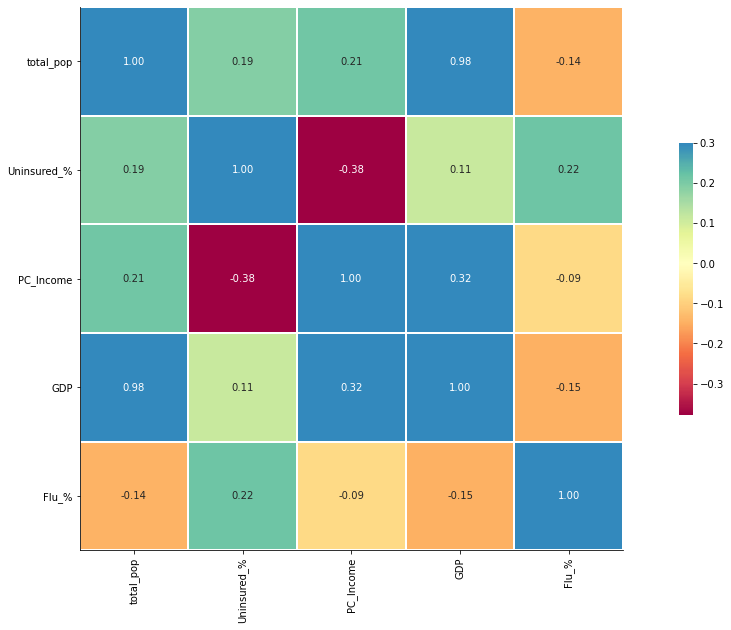

In [32]:
corr = viral_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(20,10)
    
plt.show()

In [ ]:
svm.savefig('svm_conf.png', dpi=400)

In [33]:
# Creating the correlation matrix
viral_df.corr()

,total_pop,Uninsured_%,PC_Income,GDP,Flu_%
total_pop,1.000000,0.191784,0.211672,0.981616,-0.144242
Uninsured_%,0.191784,1.000000,-0.377154,0.113213,0.216051
PC_Income,0.211672,-0.377154,1.000000,0.315699,-0.085205
GDP,0.981616,0.113213,0.315699,1.000000,-0.145826
Flu_%,-0.144242,0.216051,-0.085205,-0.145826,1.000000


In [42]:
# viral_df.head()

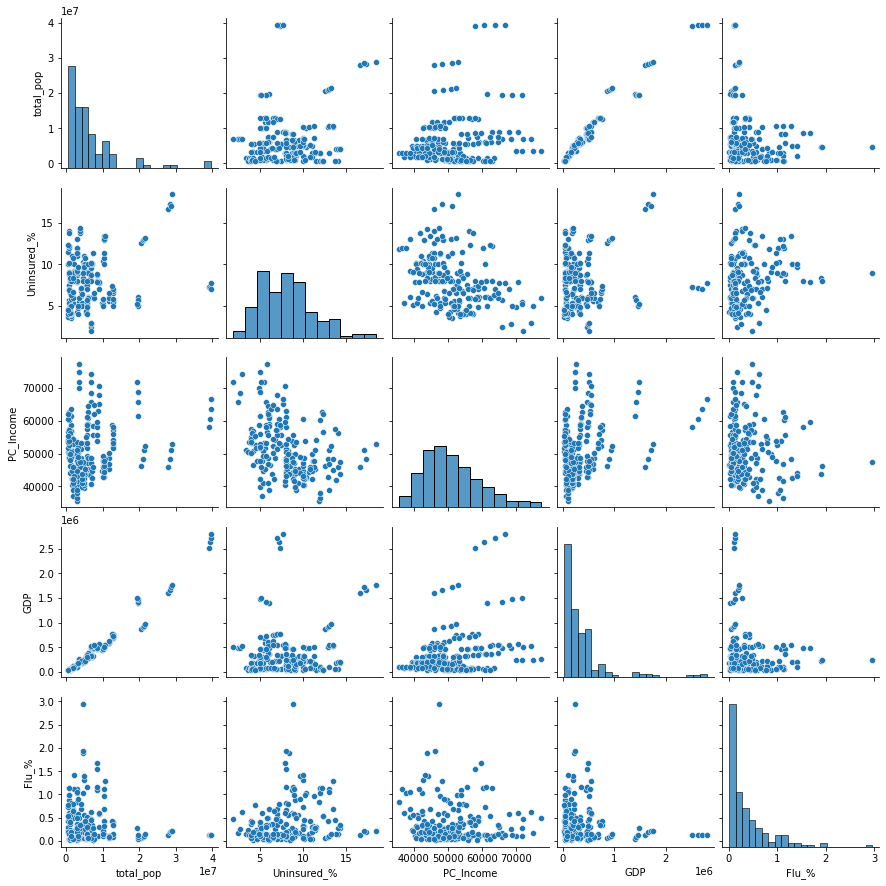

In [36]:
sns.pairplot(viral_df)

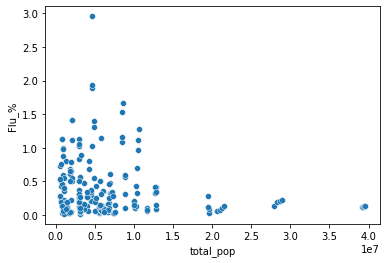

In [41]:
sns.scatterplot(data=viral_df, x="total_pop", y="Flu_%")

In [ ]:
# corr = viral_df.corr()
# svm = sns.heatmap(corr, annot=True,cmap='coolwarm', linecolor='white', linewidths=1)
# figure = svm.get_figure() 

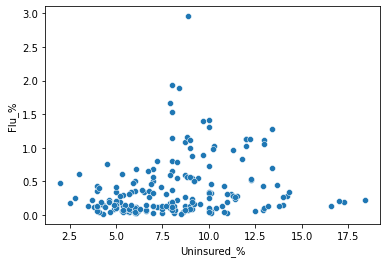

In [38]:
sns.scatterplot(data=viral_df, x="Uninsured_%", y="Flu_%")

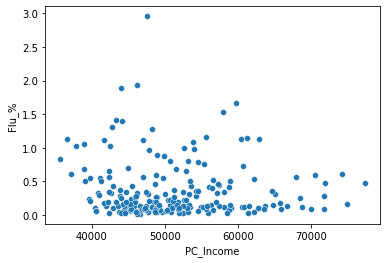

In [39]:
sns.scatterplot(data=viral_df, x="PC_Income", y="Flu_%")

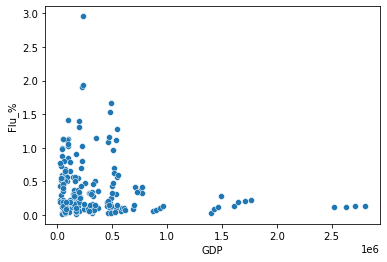

In [40]:
sns.scatterplot(data=viral_df, x="GDP", y="Flu_%")

In [41]:
# Saving the new combined cleaned dataset
viral_df.to_csv("viral_data.csv")